In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv('Validation.csv')
df.head(5)

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
0,886447,1004004,Andromeda Galaxy (M31),0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,687564,1005006,Andromeda Galaxy (M31),0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,494935,1006009,Andromeda Galaxy (M31),0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,378919,1015056,Andromeda Galaxy (M31),0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.753738,NaN,NaN
4,421878,1004004,Andromeda I,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns 

Index(['ID', 'galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15â€“64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Lif

In [ ]:
df=df[[ 'ID',
       #'galactic year', 'galaxy', 
       'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       #'Mean years of education (galactic years)',
       #'Intergalactic Development Index (IDI)', 'Education Index',
       #'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       #'Gross capital formation (% of GGP)', 
        'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15â€“64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expectancy at birth, female (galactic years)',
       #'Population, under age 5 (millions)',
       'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)',
       'Adolescent birth rate (births per 1,000 female creatures ages 15-19)',
       'Total unemployment rate (female to male ratio)',
       'Vulnerable employment (% of total employment)',
       'Unemployment, total (% of labour force)',
       'Employment in agriculture (% of total employment)',
       'Labour force participation rate (% ages 15 and older)',
       'Labour force participation rate (% ages 15 and older), female',
       'Employment in services (% of total employment)',
       'Labour force participation rate (% ages 15 and older), male',
       'Employment to population ratio (% ages 15 and older)',
      # 'Jungle area (% of total land area)',
       #'Share of employment in nonagriculture, female (% of total employment in nonagriculture)',
       #'Youth unemployment rate (female to male ratio)',
       'Unemployment, youth (% ages 15â€“24)',
       'Mortality rate, female grown up (per 1,000 people)',
       'Mortality rate, male grown up (per 1,000 people)',
       'Infants lacking immunization, red hot disease (% of one-galactic year-olds)',
       'Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)',
       #'Gross galactic product (GGP) per capita',
       #'Gross galactic product (GGP), total',
       #'Outer Galaxies direct investment, net inflows (% of GGP)',
       #'Exports and imports (% of GGP)',
       #'Share of seats in senate (% held by female)',
       'Natural resource depletion',
       'Mean years of education, female (galactic years)',
       'Mean years of education, male (galactic years)',
       'Expected years of education, female (galactic years)',
       'Expected years of education, male (galactic years)',
       'Maternal mortality ratio (deaths per 100,000 live births)',
      # 'Renewable energy consumption (% of total final energy consumption)',
       'Estimated gross galactic income per capita, male',
       'Estimated gross galactic income per capita, female',
       #'Rural population with access to electricity (%)',
       'Domestic credit provided by financial sector (% of GGP)',
       'Population with at least some secondary education, female (% ages 25 and older)',
       'Population with at least some secondary education, male (% ages 25 and older)',
       'Gross fixed capital formation (% of GGP)',
       #'Remittances, inflows (% of GGP)',
       'Population with at least some secondary education (% ages 25 and older)',
       'Intergalactic inbound tourists (thousands)',
       'Gross enrolment ratio, primary (% of primary under-age population)',
       'Respiratory disease incidence (per 100,000 people)',
       #'Interstellar phone subscriptions (per 100 people)',
       #'Interstellar Data Net users, total (% of population)',
       'Current health expenditure (% of GGP)',
      # 'Intergalactic Development Index (IDI), female',
       #'Intergalactic Development Index (IDI), male',
       'Gender Development Index (GDI)',
       #'Intergalactic Development Index (IDI), female, Rank',
      # 'Intergalactic Development Index (IDI), male, Rank',
       'Adjusted net savings ',
       'Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total',
       'Private galaxy capital flows (% of GGP)',
       'Gender Inequality Index (GII)', ]].copy()   #to let know pandas of the new data to use

In [4]:
df_corr = df[['Gross income per capita', 'Income Index',
                   'Population using at least basic sanitation services (%)',
                  'Population using at least basic drinking-water services (%)',   
                 'Expected years of education (galactic years)'
    ]].dropna().corr() #checking correlation for our selected variables before narrowing to strong identifiers 

df_corr

,Gross income per capita,Income Index,Population using at least basic sanitation services (%),Population using at least basic drinking-water services (%),Expected years of education (galactic years)
Gross income per capita,1.000000,0.744438,0.525635,0.488160,0.538638
Income Index,0.744438,1.000000,0.733856,0.706431,0.717385
Population using at least basic sanitation services (%),0.525635,0.733856,1.000000,0.791170,0.694718
Population using at least basic drinking-water services (%),0.488160,0.706431,0.791170,1.000000,0.682090
Expected years of education (galactic years),0.538638,0.717385,0.694718,0.682090,1.000000


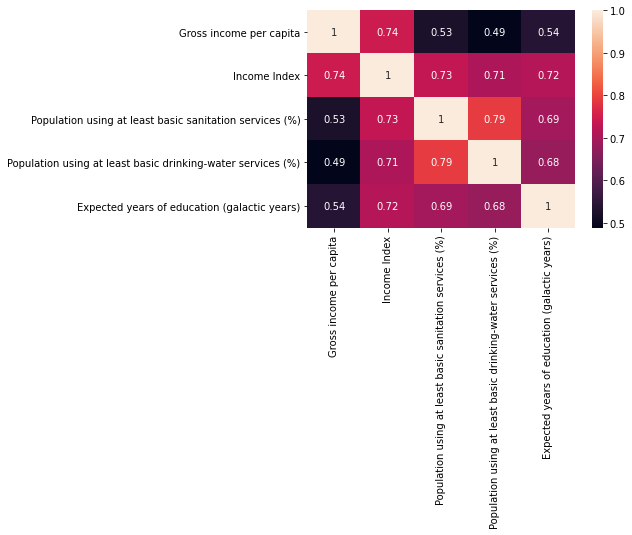

In [5]:
sns.heatmap(df_corr, annot=True) 

In [6]:
df = df[['Gross income per capita', 'Income Index',
                   'Population using at least basic sanitation services (%)',
                  'Population using at least basic drinking-water services (%)',   
                 'Expected years of education (galactic years)']].fillna(0)

In [7]:

x = df[['Gross income per capita',
                   'Population using at least basic sanitation services (%)',
                  'Population using at least basic drinking-water services (%)',   
                 'Expected years of education (galactic years)']]
y = df['Income Index']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [8]:
ml= LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred=ml.predict(x_test)
print(y_pred) 

[1.14515344 1.04313537 0.79937184 1.05135286 1.03448313 0.73914882
 0.84042109 1.0025501  0.80125641 0.76616596 1.12197758 0.84428756
 0.96586511 0.87894138 0.84595882 1.0306938  1.51226644 1.03428571
 0.84234361 0.85842466 0.78909692 1.10647185 1.04511842 0.92272937
 1.15160304 0.88867039 0.75026107 0.74145951 0.81818335 0.57862552
 0.92915987 0.84182122 0.89915337 0.7236078  0.83338124 0.78371268
 0.68450469 1.07121543 0.79198876 0.94853578 0.87139141 1.38347836
 0.89013783 0.94087406 0.89945072 0.66090846 0.67661726 1.40892538
 0.78458435 0.64361064 0.88007751 1.04376466 0.93748898 0.80993023
 1.06974985 0.66809443 0.75806269 0.96377653 0.90888152 0.67739999
 0.73081352 0.84236959 0.87776896 1.15490715 0.90912668 0.85443584
 1.05070671 0.87466731 0.93249815 0.61478261 1.03333611 0.51927754
 0.91880495 0.84444397 0.88306405 0.70789852 0.81507122 0.57277544
 0.90050032 1.22006696 1.0287275  1.08249752 0.75032541 1.05842928
 0.92492848 0.65090788 0.79499449 1.07799517 1.44353911 0.7475

In [10]:
r2_score(y_test,y_pred) 

0.7087865523068727